In [1]:
# importing modules
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn import datasets
from sklearn import model_selection
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# fetching datasets
dataset = datasets.fetch_20newsgroups() 
x = dataset.data
y = dataset.target
print(len(x))

11314


In [3]:
# stopwords removal
from nltk.corpus import stopwords
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)
stops = stopwords.words("english")
# punctuation removal
import string
punc = list(string.punctuation)
stops = stops+punc
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
# making the dictionary 
len_data = len(x_train)
dictionary = dict()
for j in range(len_data):
    data = x_train[j]
    word_tokens = word_tokenize(data)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stops]
    for wd in filtered_sentence:
        if wd.isalpha()==True:
            if wd in dictionary:
                dictionary[wd]+=1
            else:
                dictionary[wd]=1
print(dictionary)

{'edhall': 2, 'Ed': 190, 'Hall': 142, 'Subject': 8851, 'Building': 39, 'UV': 38, 'flashlight': 11, 'Organization': 8213, 'RAND': 1, 'Lines': 8514, 'article': 4999, 'jhawk': 4, 'John': 983, 'Hawkinson': 4, 'writes': 5830, 'One': 736, 'thing': 1097, 'friend': 328, 'mine': 335, 'mentioned': 302, 'something': 1619, 'light': 340, 'cheaper': 115, 'get': 3631, 'actual': 170, 'anyone': 1602, 'know': 3818, 'referring': 64, 'want': 1830, 'semantic': 8, 'argument': 440, 'contrary': 94, 'postings': 151, 'near': 273, 'means': 696, 'close': 283, 'visible': 104, 'spectrum': 48, 'relatively': 96, 'long': 891, 'wavelength': 8, 'nearly': 128, 'sure': 1110, 'figure': 277, 'far': 856, 'Regular': 16, 'incandenscent': 1, 'bulbs': 9, 'emit': 8, 'tiny': 44, 'amounts': 63, 'end': 721, 'filter': 53, 'used': 1761, 'remove': 92, 'thus': 225, 'create': 262, 'weak': 102, 'source': 488, 'Stronger': 2, 'sources': 238, 'going': 1519, 'require': 223, 'gas': 270, 'probably': 926, 'mercury': 2, 'vapor': 5, 'discharge': 2

In [5]:
# sort the dictionary on the basis of decreasing order
sorted_d = sorted(dictionary.items(), key=lambda kv: kv[1],reverse=True)
len(sorted_d)

82479

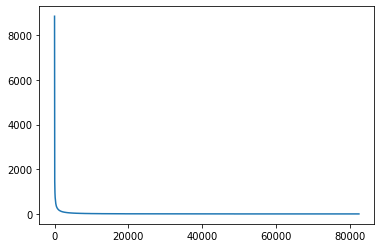

In [6]:
# make a graph between frequency and words to get cutoff value
x = np.array(range(len(dictionary)))
fq = [f for w, f in sorted_d]
y = np.array(fq)
plt.plot(x,y)
plt.show()

In [7]:
# on the basis of plot,select the top k words as features
features_set = sorted_d[:3000]
features_set

[('Subject', 8851),
 ('Lines', 8514),
 ('Organization', 8213),
 ('would', 6852),
 ('writes', 5830),
 ('one', 5685),
 ('article', 4999),
 ('people', 4163),
 ('like', 4126),
 ('University', 4087),
 ('know', 3818),
 ('get', 3631),
 ('MAX', 3392),
 ('think', 3353),
 ('Q', 2975),
 ('use', 2968),
 ('time', 2785),
 ('could', 2581),
 ('also', 2577),
 ('R', 2545),
 ('good', 2436),
 ('G', 2384),
 ('even', 2133),
 ('way', 2107),
 ('may', 2080),
 ('see', 2074),
 ('much', 2040),
 ('make', 1987),
 ('say', 1984),
 ('two', 1937),
 ('Distribution', 1926),
 ('P', 1902),
 ('God', 1872),
 ('said', 1850),
 ('first', 1837),
 ('want', 1830),
 ('many', 1827),
 ('right', 1816),
 ('used', 1761),
 ('new', 1735),
 ('system', 1693),
 ('work', 1664),
 ('need', 1653),
 ('something', 1619),
 ('anyone', 1602),
 ('problem', 1595),
 ('well', 1591),
 ('N', 1574),
 ('X', 1531),
 ('world', 1521),
 ('going', 1519),
 ('us', 1471),
 ('really', 1457),
 ('go', 1440),
 ('believe', 1427),
 ('still', 1423),
 ('find', 1396),
 ('bac

In [8]:
# get the features in the form of list
features = [p[0] for p in features_set]
features

['Subject',
 'Lines',
 'Organization',
 'would',
 'writes',
 'one',
 'article',
 'people',
 'like',
 'University',
 'know',
 'get',
 'MAX',
 'think',
 'Q',
 'use',
 'time',
 'could',
 'also',
 'R',
 'good',
 'G',
 'even',
 'way',
 'may',
 'see',
 'much',
 'make',
 'say',
 'two',
 'Distribution',
 'P',
 'God',
 'said',
 'first',
 'want',
 'many',
 'right',
 'used',
 'new',
 'system',
 'work',
 'need',
 'something',
 'anyone',
 'problem',
 'well',
 'N',
 'X',
 'world',
 'going',
 'us',
 'really',
 'go',
 'believe',
 'still',
 'find',
 'back',
 'years',
 'point',
 'using',
 'take',
 'things',
 'better',
 'year',
 'B',
 'C',
 'might',
 'got',
 'W',
 'must',
 'question',
 'ca',
 'last',
 'never',
 'since',
 'number',
 'Thanks',
 'help',
 'made',
 'information',
 'government',
 'David',
 'sure',
 'without',
 'thing',
 'read',
 'available',
 'another',
 'U',
 'someone',
 'F',
 'come',
 'little',
 'Computer',
 'New',
 'around',
 'drive',
 'case',
 'fact',
 'L',
 'etc',
 'anything',
 'John',
 '

In [9]:
# printing the features
print(features)

['Subject', 'Lines', 'Organization', 'would', 'writes', 'one', 'article', 'people', 'like', 'University', 'know', 'get', 'MAX', 'think', 'Q', 'use', 'time', 'could', 'also', 'R', 'good', 'G', 'even', 'way', 'may', 'see', 'much', 'make', 'say', 'two', 'Distribution', 'P', 'God', 'said', 'first', 'want', 'many', 'right', 'used', 'new', 'system', 'work', 'need', 'something', 'anyone', 'problem', 'well', 'N', 'X', 'world', 'going', 'us', 'really', 'go', 'believe', 'still', 'find', 'back', 'years', 'point', 'using', 'take', 'things', 'better', 'year', 'B', 'C', 'might', 'got', 'W', 'must', 'question', 'ca', 'last', 'never', 'since', 'number', 'Thanks', 'help', 'made', 'information', 'government', 'David', 'sure', 'without', 'thing', 'read', 'available', 'another', 'U', 'someone', 'F', 'come', 'little', 'Computer', 'New', 'around', 'drive', 'case', 'fact', 'L', 'etc', 'anything', 'John', 'program', 'file', 'part', 'key', 'version', 'give', 'says', 'E', 'least', 'data', 'course', 'K', 'car', 

In [10]:
no_of_datapoints = len(x_train)
print(no_of_datapoints)

8485


In [11]:
no_of_features = len(features)
print(no_of_features)

3000


In [12]:
# make a dictinary for storing frequency of words (non-stopping words) along with words for x_train and x_test
def make_dict(word_list):
    out_d = {}
    for w in word_list:
        if w.isalpha()==True:
            if w.lower() not in stops:
                if w in out_d:
                    out_d[w]+=1
                else:
                    out_d[w]=1
    return out_d

In [13]:
# making list of dictionary for x_train
x_train_dict = [make_dict(word_tokenize(s)) for s in x_train]
len(x_train_dict)

8485

In [14]:
# making list of dictionary for x_test
x_test_dict = [make_dict(word_tokenize(s)) for s in x_test]
x_test_dict

[{'hagins': 3,
  'Jody': 2,
  'Hagins': 2,
  'Subject': 1,
  'lose': 2,
  'openr': 1,
  'home': 1,
  'Rangers': 1,
  'Organization': 1,
  'Data': 2,
  'General': 2,
  'Corporation': 2,
  'Linthicum': 2,
  'MD': 2,
  'Lines': 1,
  'Sutcliffe': 3,
  'gives': 2,
  'HRs': 1,
  'Gonzales': 2,
  'Palmer': 1,
  'Mills': 1,
  'HR': 1,
  'Texas': 1,
  'Lefferts': 1,
  'Baltimore': 1},
 {'gloege': 3,
  'Andreas': 2,
  'Gloege': 2,
  'Subject': 1,
  'OTTOMENU': 1,
  'Get': 1,
  'Originator': 1,
  'Organization': 1,
  'Technische': 1,
  'Universitaet': 1,
  'Muenchen': 2,
  'Germany': 1,
  'Lines': 1,
  'heard': 1,
  'Ottomenu': 1,
  'good': 1,
  'desktop': 1,
  'Windows': 1,
  'anybody': 1,
  'tell': 1,
  'get': 1,
  'CICA': 1,
  'also': 1,
  'WUSTL': 1,
  'SIMTEL': 1,
  'great': 1,
  'number': 1,
  'sites': 1,
  'post': 1,
  'mail': 1,
  'bei': 1,
  'Klarmann': 1,
  'email': 1},
 {'lisa': 2,
  'Lisa': 2,
  'Rowlands': 2,
  'news': 1,
  'Subject': 1,
  'Paint': 1,
  'jobs': 2,
  'UK': 1,
  'baldr

In [15]:
# a 2d matrix of x_train that is required as a input for algorithms, initialise it with zero
x_train_transformed = np.zeros([no_of_datapoints,no_of_features],dtype=int)
print(x_train_transformed.shape)

(8485, 3000)


In [16]:
# filling the 2d matrix of features of x_train
for i in range(len(x_train_dict)):
    d = x_train_dict[i]
    for j in range(len(features)):
        if features[j] in d.keys():
            x_train_transformed[i][j]+=d[features[j]]
x_train_transformed

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [17]:
# a 2d matrix of x_test that is required as a input for algorithms, initialise it with zero
x_test_transformed = np.zeros([len(x_test),no_of_features],dtype=int)
print(x_test_transformed.shape)

(2829, 3000)


In [18]:
# filling the 2d matrix of features of x_test
for i in range(len(x_test_dict)):
    d = x_test_dict[i]
    for j in range(len(features)):
        if features[j] in d.keys():
            x_test_transformed[i][j]+=d[features[j]]
x_test_transformed

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
mnb = MultinomialNB()                    # object of classifier
mnb.fit(x_train_transformed,y_train)     # fitting the classifier

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
mnb.score(x_test_transformed,y_test)     # score on the basis of testing

0.7645811240721103

In [23]:
# Implementation of multinomial naive bayes
# This function will return a dictionary with first level keys as output classes and second level keys as features and tot_count
# (tot_count is the count of entries with specific output class)
def fit(x_train_transformed,y_train):
    count_dict = {}
    st = set(y_train)
    for val in st:
        tot_cnt = 0
        count_dict[val]={}
        x_val = []           # documents having classified as val
        for i in range(len(y_train)):
            if y_train[i]==val:
                x_val.append(list(x_train_transformed[i]))
        x_val = np.array(x_val)
        for j in range(len(features)):
            count_dict[val][features[j]] = x_val[:,j].sum()
            tot_cnt += count_dict[val][features[j]]
        print(tot_cnt)
        count_dict[val]['tot_count'] = tot_cnt
    return count_dict

In [24]:
# getting the dictionary that will be used for calculating probabilities
count_dict = fit(x_train_transformed,y_train)
count_dict

35708
31117
50125
30190
25218
42943
18795
32744
27196
31731
44006
58683
31697
38406
41540
51904
47194
68003
48554
31995


{0: {'Subject': 351,
  'Lines': 351,
  'Organization': 320,
  'would': 364,
  'writes': 394,
  'one': 399,
  'article': 274,
  'people': 368,
  'like': 183,
  'University': 138,
  'know': 184,
  'get': 88,
  'MAX': 0,
  'think': 282,
  'Q': 3,
  'use': 63,
  'time': 149,
  'could': 156,
  'also': 80,
  'R': 18,
  'good': 110,
  'G': 8,
  'even': 140,
  'way': 133,
  'may': 94,
  'see': 126,
  'much': 100,
  'make': 120,
  'say': 225,
  'two': 54,
  'Distribution': 49,
  'P': 41,
  'God': 300,
  'said': 134,
  'first': 69,
  'want': 65,
  'many': 124,
  'right': 96,
  'used': 61,
  'new': 37,
  'system': 155,
  'work': 27,
  'need': 54,
  'something': 126,
  'anyone': 60,
  'problem': 39,
  'well': 82,
  'N': 6,
  'X': 7,
  'world': 103,
  'going': 52,
  'us': 85,
  'really': 65,
  'go': 56,
  'believe': 150,
  'still': 70,
  'find': 62,
  'back': 42,
  'years': 58,
  'point': 97,
  'using': 29,
  'take': 68,
  'things': 120,
  'better': 65,
  'year': 10,
  'B': 43,
  'C': 27,
  'might'

In [25]:
import math   # for log function

In [26]:
# to get the output class for a document of testing dataset
def predict(count_dict,x_test):
    max_prob = 0      # to compare the probability to get max probability
    output = -1       # output class
    fg=0              # flag used to set the max_prob and output on the basis of first iteration
    for k in count_dict:
        prob = 0
        for j in range(len(features)):
            if x_test[j]>0:
                p_val = (count_dict[k][features[j]]+1)/(count_dict[k]['tot_count']+len(features))
                p = math.log(p_val)
                prob += p
        if fg==0:
            max_prob = prob
            output = k
            fg=1
        elif prob > max_prob:
            max_prob = prob
            output = k
    return output

In [27]:
# prediction of class for x_test 2d matrix of features (with self implemented multinomial naive bayes algo)
y_test_predict = np.array([predict(count_dict,i) for i in x_test_transformed])
y_test_predict

array([ 9,  1,  8, ..., 18,  3,  9])

In [28]:
# subtracting y_test_predict from y_test, summing it to get the the sum of all differences 
score_for_self_implemented = (y_test==y_test_predict).sum() / len(y_test)
score_for_self_implemented

0.7592788971367974

In [29]:
# prediction of class for x_test 2d matrix of features (with built in multinomial naive bayes algo)
y_test_mnb = mnb.predict(x_test_transformed)
y_test_mnb

array([ 6,  1,  8, ..., 18,  3,  9])

In [30]:
# subtracting y_test_mnb from y_test, summing it to get the the sum of all differences 
score_for_mnb = (y_test==y_test_mnb).sum() / len(y_test)
score_for_mnb

0.7645811240721103

In [31]:
# comparison of score_for_self_implemented and score_for_mnb shows that self implemented multinomial naive bayes algo is showing
# more errors as compared to  built in multinomial naive bayes algo.